# 📈 TCS Stock Price Forecasting

This notebook implements a complete time series forecasting pipeline for Tata Consultancy Services (TCS) stock prices. 

### Workflow:
1. **Data Acquisition**: Fetching historical data via Yahoo Finance.
2. **EDA**: Visualizing trends and correlations.
3. **Preprocessing**: Scaling and sequence generation.
4. **Modeling**: Comparing Linear Regression, Random Forest, and LSTM.
5. **Evaluation**: Analyzing performance metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date

# Load Dataset


In [2]:
import yfinance as yf

In [3]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

/tmp/ipython-input-2158140052.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551361,270.132013,266.625873,268.672597,1963682
1,2010-01-05,267.622437,270.363271,265.735896,268.743694,2014488
2,2010-01-06,261.571289,267.747069,260.912787,267.622472,3349176
3,2010-01-07,254.292099,263.190898,253.081854,261.802677,6474892
4,2010-01-08,249.095306,255.751616,247.920669,254.861735,6048178


# Preprocessing


In [5]:
df.columns = df.columns.droplevel(1)
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2010-01-04,267.551361,270.132013,266.625873,268.672597,1963682
1,2010-01-05,267.622437,270.363271,265.735896,268.743694,2014488
2,2010-01-06,261.571289,267.747069,260.912787,267.622472,3349176
3,2010-01-07,254.292099,263.190898,253.081854,261.802677,6474892
4,2010-01-08,249.095306,255.751616,247.920669,254.861735,6048178


In [6]:
df.columns.name = None

In [7]:
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [8]:
df=df.drop(['Date'],axis=1)
df.head()

,Close,High,Low,Open,Volume
0,267.551361,270.132013,266.625873,268.672597,1963682
1,267.622437,270.363271,265.735896,268.743694,2014488
2,261.571289,267.747069,260.912787,267.622472,3349176
3,254.292099,263.190898,253.081854,261.802677,6474892
4,249.095306,255.751616,247.920669,254.861735,6048178


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3940 non-null   float64
 1   High    3940 non-null   float64
 2   Low     3940 non-null   float64
 3   Open    3940 non-null   float64
 4   Volume  3940 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.0 KB


In [10]:
df.describe()

,Close,High,Low,Open,Volume
count,3940.000000,3940.000000,3940.000000,3940.000000,3.940000e+03
mean,1726.424681,1743.731318,1709.656406,1727.068118,2.743032e+06
std,1184.732372,1195.115174,1175.129944,1185.247249,2.157390e+06
min,249.095306,254.823716,244.562955,250.590322,0.000000e+00
25%,807.429901,817.045604,797.563109,807.164927,1.692779e+06
50%,1128.790955,1137.185150,1117.487837,1126.799622,2.308395e+06
75%,2969.963257,2993.722437,2944.133761,2973.858014,3.216511e+06
max,4389.964844,4427.080111,4349.717095,4411.415210,8.806715e+07


In [11]:
df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [12]:
df.duplicated().sum()

np.int64(0)

# EDA


<Axes: >

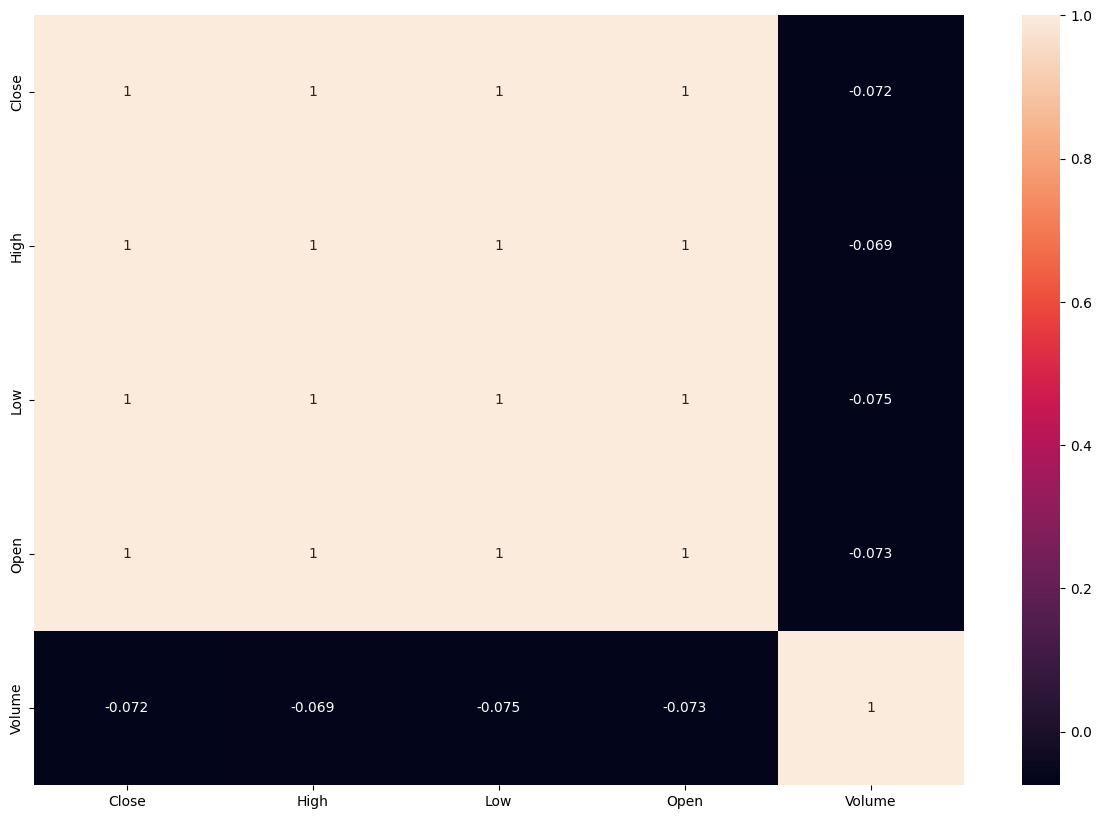

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

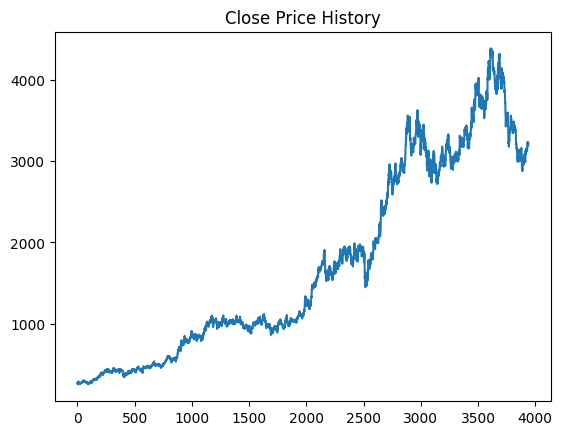

In [14]:
plt.title('Close Price History')
plt.plot(df['Close'])

In [15]:
df

,Close,High,Low,Open,Volume
0,267.551361,270.132013,266.625873,268.672597,1963682
1,267.622437,270.363271,265.735896,268.743694,2014488
2,261.571289,267.747069,260.912787,267.622472,3349176
3,254.292099,263.190898,253.081854,261.802677,6474892
4,249.095306,255.751616,247.920669,254.861735,6048178
...,...,...,...,...,...
3935,3189.199951,3225.000000,3178.100098,3225.000000,1386849
3936,3191.899902,3208.399902,3153.100098,3205.000000,1914362
3937,3220.500000,3223.000000,3185.699951,3197.699951,1146554
3938,3230.199951,3238.199951,3197.300049,3211.100098,1562190


In [16]:
mov_avg_100 = df.Close.rolling(100).mean()
mov_avg_100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3935,3066.682031
3936,3066.820562
3937,3067.560916
3938,3068.384319


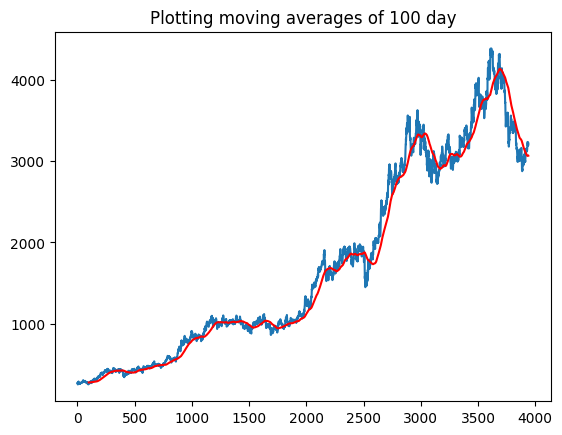

In [17]:
plt.title('Plotting moving averages of 100 day')
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')

In [18]:
mov_avg_200 = df.Close.rolling(200).mean()
mov_avg_200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3935,3243.579609
3936,3240.918177
3937,3238.422875
3938,3235.943595


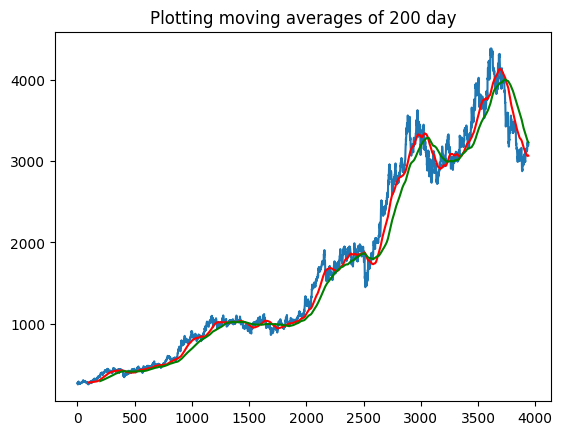

In [19]:
plt.title('Plotting moving averages of 200 day')
plt.plot(df.Close)
plt.plot(mov_avg_100,'r')
plt.plot(mov_avg_200,'g')


In [20]:
y = df['Close']
X = df.drop(['Close'], axis=1)

In [21]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X_train = X[:split_index]
X_test  = X[split_index:]

y_train = y[:split_index]
y_test  = y[split_index:]

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1,1))

In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train_scaled.ravel())
rf_predictions = rf_model.predict(X_test_scaled)
rf_predictions = rf_predictions.reshape(-1,1)

In [25]:
lr_predictions_actual = scaler_y.inverse_transform(lr_predictions)
rf_predictions_actual = scaler_y.inverse_transform(rf_predictions)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [27]:
print("Linear Regression Results")
print("MAE:", mean_absolute_error(y_test_actual, lr_predictions_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, lr_predictions_actual)))
print("R2 Score:", r2_score(y_test_actual, lr_predictions_actual))


Linear Regression Results
MAE: 11.902840327999112
RMSE: 15.618865693483247
R2 Score: 0.9985599063198443


In [28]:
print("\nRandom Forest Results")
print("MAE:", mean_absolute_error(y_test_actual, rf_predictions_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, rf_predictions_actual)))
print("R2 Score:", r2_score(y_test_actual, rf_predictions_actual))



Random Forest Results
MAE: 134.30513815323098
RMSE: 245.3911087226934
R2 Score: 0.644524716434934


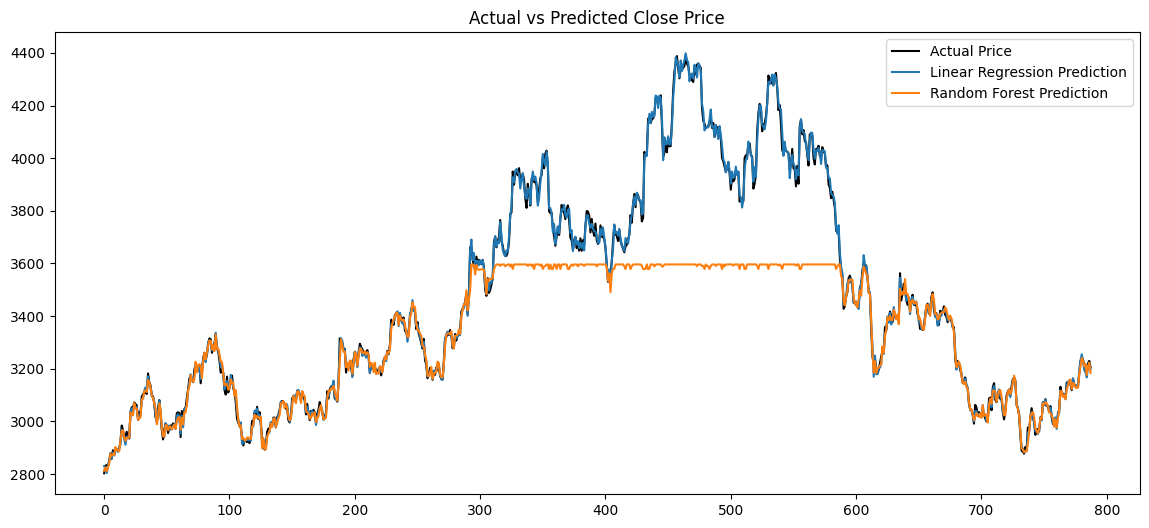

In [29]:
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label='Actual Price', color='black')
plt.plot(lr_predictions_actual, label='Linear Regression Prediction')
plt.plot(rf_predictions_actual, label='Random Forest Prediction')
plt.legend()
plt.title('Actual vs Predicted Close Price')
plt.show()

In [30]:
data = df[['Close']]

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [32]:
training_size = int(len(scaled_data) * 0.8)

train_data = scaled_data[:training_size]
test_data  = scaled_data[training_size:]

In [33]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [34]:
time_step = 60

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test   = create_dataset(test_data, time_step)

In [35]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0321
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1638e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0034e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9040e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8936e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6593e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6968e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7948e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7362e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7258e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7621e-04
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5626e-04
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5487e-04
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5889e-04
Epoch 15/50
49/49 ━━━━━━━━━━━

In [38]:
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [39]:
train_predict = scaler.inverse_transform(train_predict)
y_train_inv   = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict  = scaler.inverse_transform(test_predict)
y_test_inv    = scaler.inverse_transform(y_test.reshape(-1,1))

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np
print("Train RMSE:",
      np.sqrt(mean_squared_error(y_train_inv, train_predict)))
print("Test RMSE:",
      np.sqrt(mean_squared_error(y_test_inv, test_predict)))

Train RMSE: 39.057298691110674
Test RMSE: 86.65257734460265


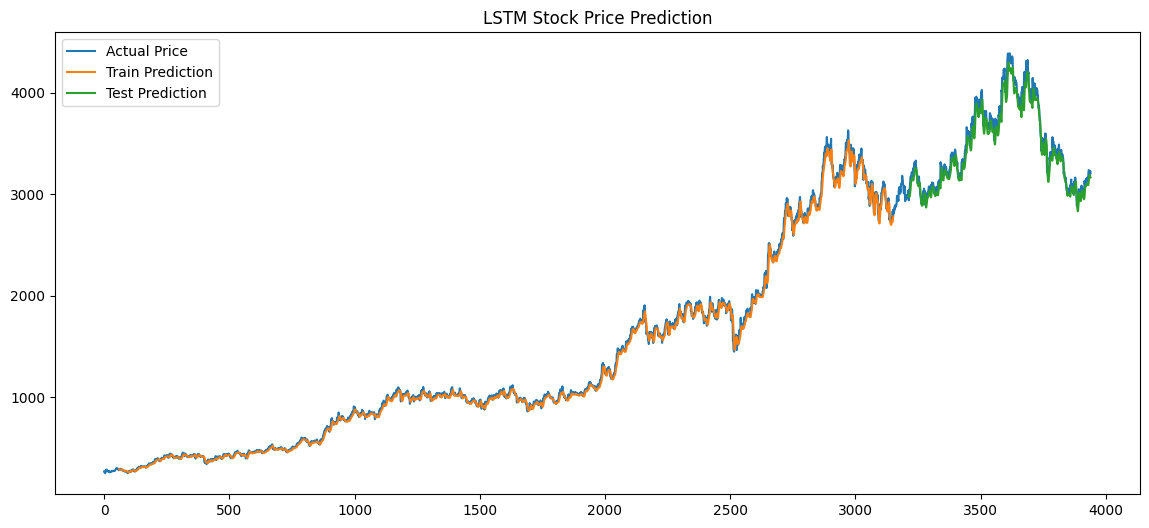

In [41]:
look_back = time_step
train_plot = np.empty_like(scaled_data)
train_plot[:] = np.nan
train_plot[look_back:len(train_predict)+look_back] = train_predict
test_plot = np.empty_like(scaled_data)
test_plot[:] = np.nan
test_plot[len(train_predict)+(look_back*2):len(scaled_data)] = test_predict
plt.figure(figsize=(14,6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.legend()
plt.title('LSTM Stock Price Prediction')
plt.show()

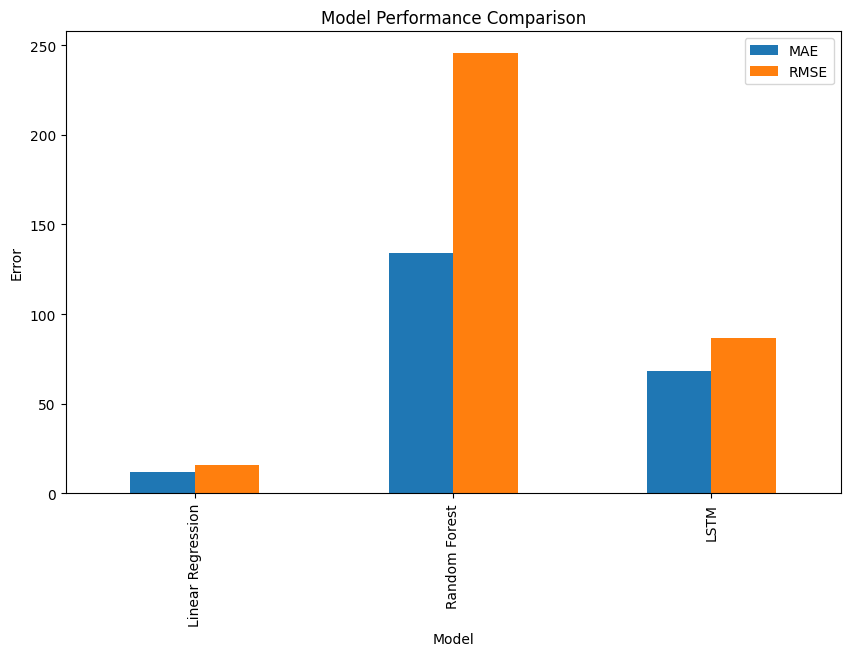

In [42]:
lr_mae = mean_absolute_error(y_test_actual, lr_predictions_actual)
lr_rmse = np.sqrt(mean_squared_error(y_test_actual, lr_predictions_actual))

rf_mae = mean_absolute_error(y_test_actual, rf_predictions_actual)
rf_rmse = np.sqrt(mean_squared_error(y_test_actual, rf_predictions_actual))

lstm_mae = mean_absolute_error(y_test_inv, test_predict)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LSTM'],
    'MAE': [lr_mae, rf_mae, lstm_mae],
    'RMSE': [lr_rmse, rf_rmse, lstm_rmse]
})

comparison_df.set_index("Model")[["MAE", "RMSE"]].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.show()

In [43]:
results = []
results.append({
    "Model": "Linear Regression",
    "MAE": mean_absolute_error(y_test_actual, lr_predictions_actual),
    "RMSE": np.sqrt(mean_squared_error(y_test_actual, lr_predictions_actual)),
    "R2": r2_score(y_test_actual, lr_predictions_actual)
})
results.append({
    "Model": "Random Forest",
    "MAE": mean_absolute_error(y_test_actual, rf_predictions_actual),
    "RMSE": np.sqrt(mean_squared_error(y_test_actual, rf_predictions_actual)),
    "R2": r2_score(y_test_actual, rf_predictions_actual)
})
results.append({
    "Model": "Univariate LSTM",
    "MAE": mean_absolute_error(y_test_inv, test_predict),
    "RMSE": np.sqrt(mean_squared_error(y_test_inv, test_predict)),
    "R2": r2_score(y_test_inv, test_predict)
})
comparison_df = pd.DataFrame(results)
comparison_df

,Model,MAE,RMSE,R2
0,Linear Regression,11.902840,15.618866,0.998560
1,Random Forest,134.305138,245.391109,0.644525
2,Univariate LSTM,67.956414,86.652577,0.954014
